In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
%run ./DataGen2.ipynb

In [3]:
saving_path = '/Users/Eliana/Documents/PDM/images_presentation'

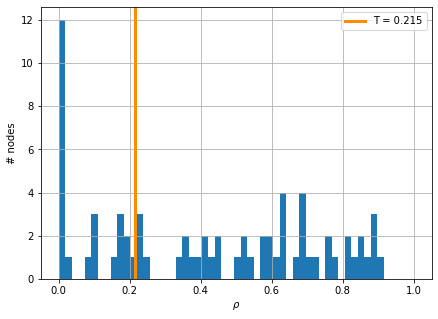

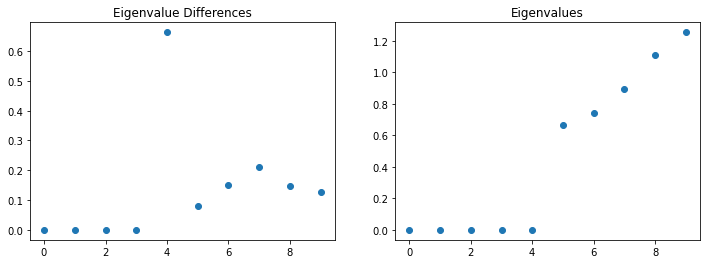

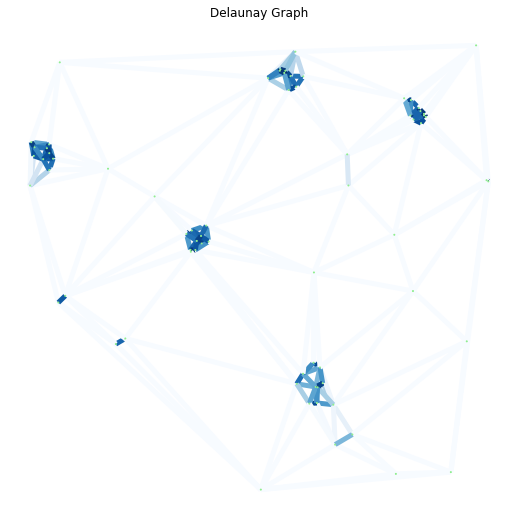

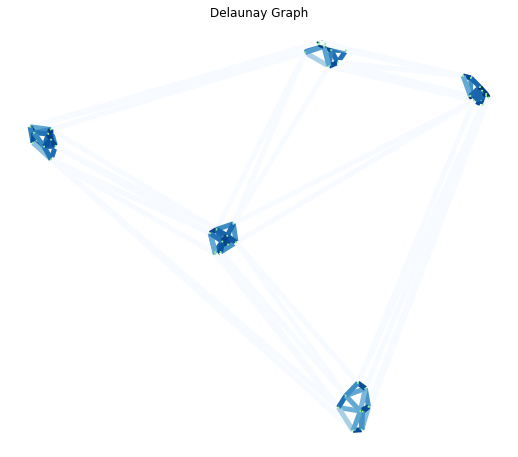

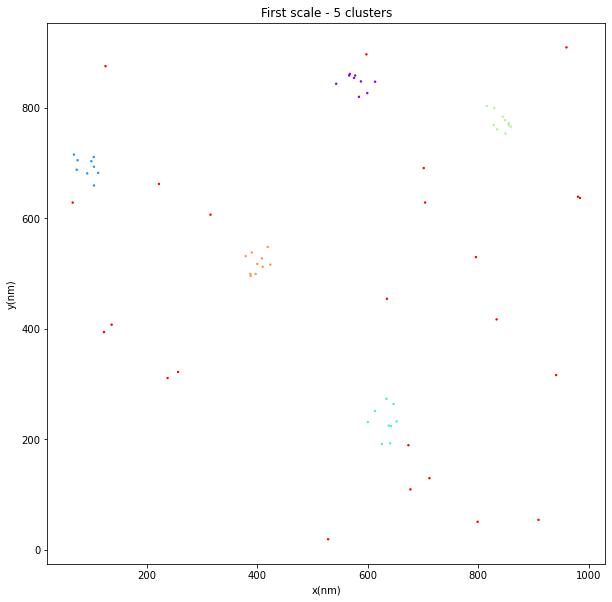

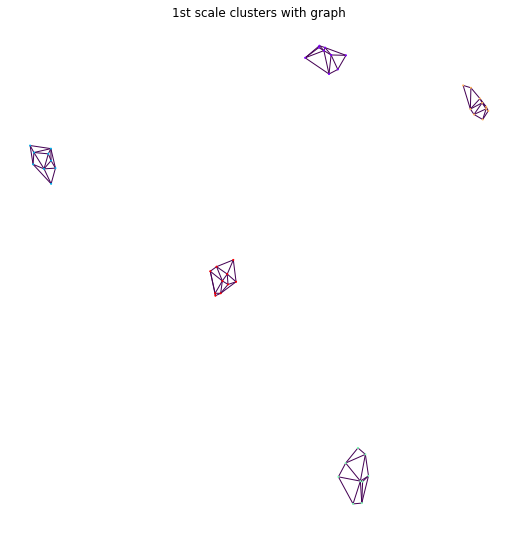

In [5]:
p = Standard_Param(NumberOfClusters = 5)
p.LocPerCluster = [10] * p.NumberOfClusters
p.r = [50] * p.NumberOfClusters
p.x_lim = [0,1]
p.y_lim = [0,1]
p.NoisePercentage = 0.3 #0.2
p.RandomSeed =  20 #23
p.mean_uncertainty = 0
p.dev_uncertainty = 0

sigma_s = 32

datagen = Call_DataGenerator(p)
df= datagen.GetAllData()
P = datagen.GetPointsCoord()
truelabels = datagen.GetPointsLabels()
N = len(datagen.GetPoints())
cov_matrices = np.asarray(datagen.GetPointsCovMatrix())
T = compute_T_95(N,  cov_matrices, sigma_s = sigma_s, x_lim = p.x_lim, y_lim = p.y_lim)

noise_thresh = T
data = datagen.GetAllData()


P1 = data[['x', 'y']].to_numpy() # select the coordinates columns, and transform into a numpy object
truelabels = data['labels_1'].to_numpy()

matrices_str = data['cov_matrix']
Sigma1 = np.zeros((len(matrices_str), 2,2))

for i, matrix_str in enumerate(matrices_str): 
    Sigma1[i,:,:] = np.array(matrix_str)

n1 = data['N_photons'].to_numpy()

density1, noise_points1, not_noise_points1, G0 = denoise(P1, Sigma1, sigma_s, noise_thresh, 1)
labels1, G1, k1 = cluster_single_scale(P1, Sigma1, not_noise_points1, sigma_s, 1)
plot_the_graph(G0, P1, 'Delaunay Graph', 1)
plot_the_graph(G1, P1[not_noise_points1], 'Delaunay Graph', 1)
labels1_fid     = labels1
plot_points(P1, labels1, 'First scale - ' + str(k1) + ' clusters', 2)
plot_clusters_with_graph(G1, P1[not_noise_points1], labels1_fid[not_noise_points1], '1st scale clusters with graph', 1)
labels1_fid += 1 # to match the convention


labels_clean = remove_small_clusters(labels1_fid, min_size = 5)


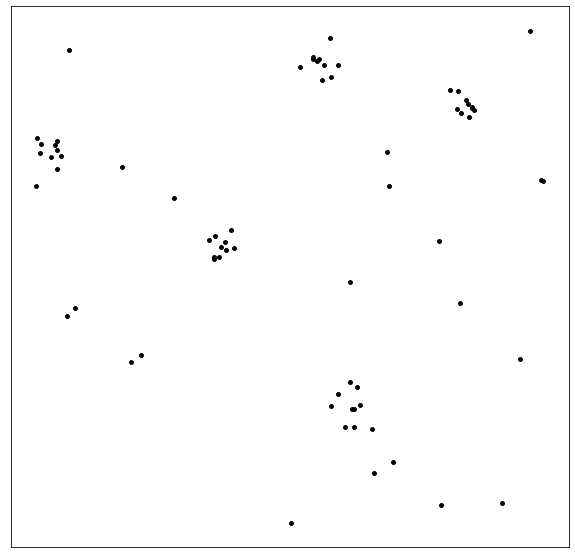

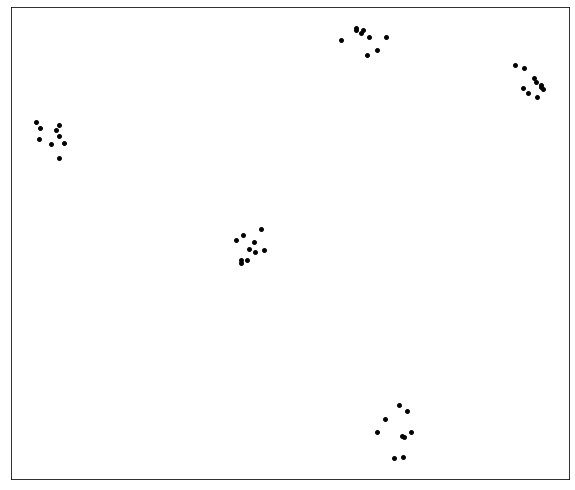

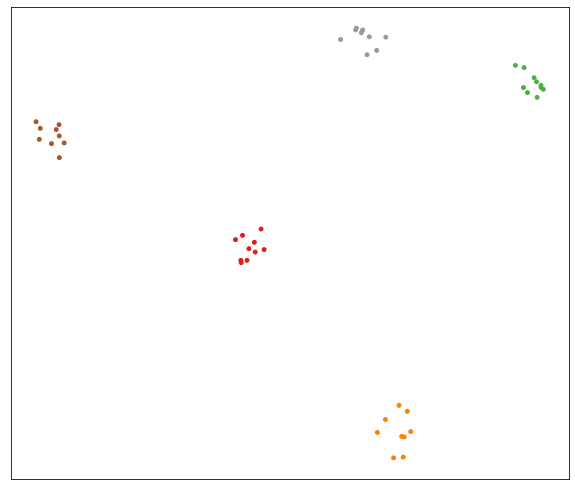

In [6]:
P = P1
labels = labels_clean
not_noise_idx = np.where(labels != 0)
noise_idx = np.where(labels == 0)

plt.figure(figsize = (10,10))
plt.scatter(P[noise_idx,0], P[noise_idx,1], c = 'black', s = 15)
#plt.scatter(P[not_noise_idx, 0], P[not_noise_idx, 1], c = labels[not_noise_idx], cmap = 'rainbow_r', s = 1)
plt.scatter(P[not_noise_idx, 0], P[not_noise_idx, 1], c = 'black', s = 15)
plt.gca().set_aspect('equal')
plt.xticks([])
plt.yticks([])
plt.savefig(saving_path + '/input_point_cloud' + '.png')


plt.figure(figsize = (10,10))
plt.scatter(P[not_noise_idx, 0], P[not_noise_idx, 1], c = 'black', s = 15)
plt.gca().set_aspect('equal')
plt.xticks([])
plt.yticks([])
plt.savefig(saving_path + '/denoised_point_cloud' + '.png')

plt.figure(figsize = (10,10))
plt.scatter(P[not_noise_idx, 0], P[not_noise_idx, 1],
                c = labels_clean[not_noise_idx] + 3, cmap = 'Set1', s = 15)
plt.gca().set_aspect('equal')
plt.xticks([])
plt.yticks([])
plt.savefig(saving_path + '/clustered_point_cloud' + '.png')

In [100]:
d = compute_density(P, cov_matrices, sigma_s)

In [10]:
data['N_photons'].to_numpy()

array([15000., 15000., 15000., 15000., 15000., 15000., 15000., 15000.,
       15000., 15000., 15000., 15000., 15000., 15000., 15000., 15000.,
       15000., 15000., 15000., 15000., 15000., 15000., 15000., 15000.,
       15000., 15000., 15000., 15000., 15000., 15000., 15000., 15000.,
       15000., 15000., 15000., 15000., 15000., 15000., 15000., 15000.,
       15000., 15000., 15000., 15000., 15000., 15000., 15000., 15000.,
       15000., 15000., 15000., 15000., 15000., 15000., 15000., 15000.,
       15000., 15000., 15000., 15000., 15000., 15000., 15000., 15000.,
       15000., 15000., 15000., 15000., 15000., 15000., 15000.])

In [22]:
cov_matrices

array([[[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.]],

       [[0.,

In [24]:
P2, Sigma2, n2, cluster_id2 = cluster_to_point(P[not_noise_idx], cov_matrices[not_noise_idx], data['N_photons'].to_numpy()[not_noise_idx], k1, labels_clean[not_noise_idx])

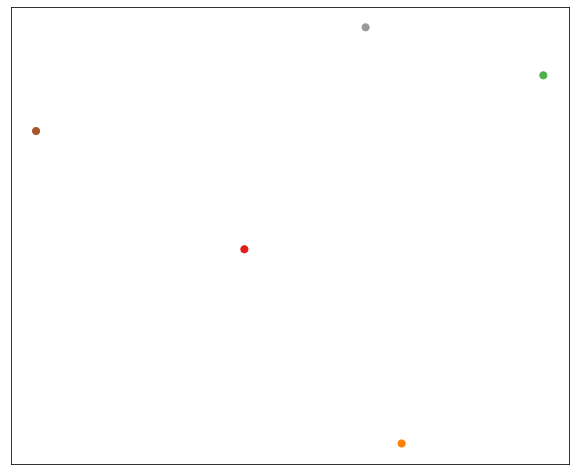

In [31]:
plt.figure(figsize = (10,10))
plt.scatter(P2[:,0], P2[:,1], c = cluster_id2 +3, cmap = 'Set1', s = 50)
plt.gca().set_aspect('equal')
plt.xticks([])
plt.yticks([])
plt.savefig(saving_path + '/next_scale_point_cloud' + '.png')

In [ ]:
def cluster_to_point(P, Sigma, n, k, labels) :
    # This function turns clusters into their respresentitive point of the next scale
    # Inputs : 
    # P_i : [x, y], the localization centers
    # Sigma_i : [[sigma_x_i, 0], [0, sigma_y_i]] where sigma_x_i and sigma_y_i are 
    # uncertinties in x and y direction  of the P_i localization respectively.
    # n_i : number of photons in P_i th detection

In [106]:
d = np.asarray(d)
d[0]

array([7.10263964e-01, 3.46070640e-01, 2.53705479e-01, 1.71580557e-01,
       4.05498831e-01, 8.09395714e-01, 8.18754674e-01, 5.91388080e-01,
       7.76253745e-01, 8.77999577e-01, 3.75816353e-01, 5.79864702e-01,
       9.16078238e-01, 5.69898474e-01, 7.62968946e-01, 6.10059260e-01,
       8.91007437e-01, 6.79384380e-01, 2.37870326e-01, 6.84663305e-01,
       6.30501282e-01, 9.75774113e-02, 4.33676740e-01, 5.22200947e-01,
       6.35453601e-01, 8.53833987e-01, 4.48506446e-01, 7.67163090e-01,
       6.94083657e-01, 8.97084793e-01, 6.64783786e-01, 6.27061778e-01,
       8.97735355e-01, 2.22739421e-01, 5.28583864e-01, 4.49907460e-01,
       8.44340459e-01, 3.89687150e-01, 5.91953786e-01, 8.34349104e-01,
       1.78147674e-01, 3.60548209e-01, 6.83410205e-01, 5.43233007e-01,
       2.26631805e-01, 7.17431368e-01, 6.40224684e-01, 5.06026302e-01,
       4.06767432e-01, 3.56879215e-01, 1.65208495e-01, 1.97120398e-01,
       1.98250327e-01, 2.99256439e-07, 1.93639097e-04, 1.66187644e-02,
      

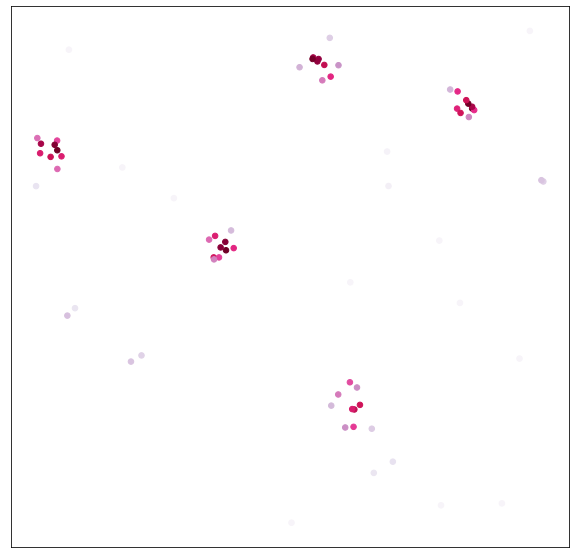

In [117]:
plt.figure(figsize = (10,10))
plt.scatter(P[:,0], P[:,1],  c = d[0], cmap = 'PuRd', s = 30)
#plt.scatter(P[not_noise_idx, 0], P[not_noise_idx, 1], c = labels[not_noise_idx], cmap = 'rainbow_r', s = 1)
#plt.scatter(P[not_noise_idx, 0], P[not_noise_idx, 1], c = 'black', s = 15)
plt.gca().set_aspect('equal')
plt.xticks([])
plt.yticks([])
plt.savefig(saving_path + '/node_density_point_cloud' + '.png')

In [15]:
data

,x,y,labels_1,sigma,N_photons,cov_matrix
0,3448.465253,2345.692261,1,20.678003,15000.0,"[[427.57981432838676, 0], [0, 427.579814328386..."
1,3461.956843,2309.959831,1,14.480285,15000.0,"[[209.678657349505, 0], [0, 209.678657349505]]"
2,3395.959368,2291.543040,1,24.823012,15000.0,"[[616.1819485708609, 0], [0, 616.1819485708609]]"
3,3420.735625,2253.252304,1,21.164876,15000.0,"[[447.95196800512514, 0], [0, 447.951968005125..."
4,3471.403010,2283.932747,1,21.199196,15000.0,"[[449.40591923243875, 0], [0, 449.405919232438..."
...,...,...,...,...,...,...
61,3276.634645,2152.749517,0,22.840959,15000.0,"[[521.7094272204453, 0], [0, 521.7094272204453]]"
62,2043.159199,3224.618907,0,16.680888,15000.0,"[[278.25202897503243, 0], [0, 278.252028975032..."
63,1771.966896,2304.034046,0,18.870500,15000.0,"[[356.0957789499751, 0], [0, 356.0957789499751]]"
64,375.453291,2695.644074,0,19.478571,15000.0,"[[379.414717848873, 0], [0, 379.414717848873]]"


In [2]:
rnd = np.random.normal(0.89, 0.01, size = 50)
GT = 0.9

Le but ici mtn c'est de voir si je peux faire un histogramme avec une ligne droite positionnée en GT. 

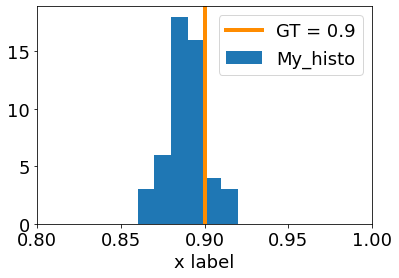

In [3]:
plt.rcParams.update({'font.size': 18})


binwidth = 0.01
histo = plt.hist(rnd, label = 'My_histo', bins=np.arange(0.8, 1 + binwidth, binwidth))

plt.axvline(x=GT, label='GT = ' + str(GT), c='DarkOrange', linewidth=4)
plt.xlabel('x label')
plt.xlim([0.8, 1])

plt.legend()
plt.show()

aller chercher le premier qui est en dessous de max(histo[0])/10

In [12]:
print(histo[0].shape)
print(histo[1].shape)

(20,)
(21,)


In [13]:
valeur = max(histo[0])/10

for i, x in enumerate(histo[1]):
    print('i = ', i)
    print('x = ', x)
    if i>0:
        if (histo[0][i-1] <= valeur):
            T = histo[1][i]

i =  0
x =  0.8
i =  1
x =  0.81
i =  2
x =  0.8200000000000001
i =  3
x =  0.8300000000000001
i =  4
x =  0.8400000000000001
i =  5
x =  0.8500000000000001
i =  6
x =  0.8600000000000001
i =  7
x =  0.8700000000000001
i =  8
x =  0.8800000000000001
i =  9
x =  0.8900000000000001
i =  10
x =  0.9000000000000001
i =  11
x =  0.9100000000000001
i =  12
x =  0.9200000000000002
i =  13
x =  0.9300000000000002
i =  14
x =  0.9400000000000002
i =  15
x =  0.9500000000000002
i =  16
x =  0.9600000000000002
i =  17
x =  0.9700000000000002
i =  18
x =  0.9800000000000002
i =  19
x =  0.9900000000000002
i =  20
x =  1.0000000000000002


In [14]:
T

1.0000000000000002

In [6]:
df = pd.DataFrame(rnd, columns = ['FMI ToMATo'])

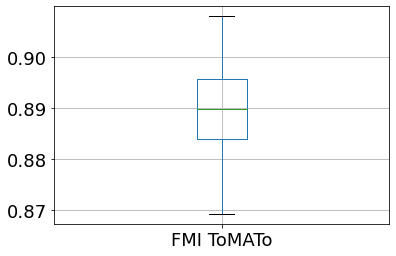

In [7]:
boxplot = df.boxplot()

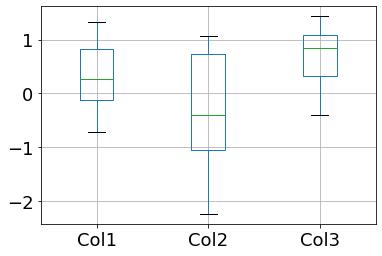

In [5]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10, 4),
                   columns=['Col1', 'Col2', 'Col3', 'Col4'])
boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])

In [ ]:
data = [data, d2, d2[::2,0]]
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data)

plt.show()

In [9]:
class Point():
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.label = []
        
        self.x_collected, self.y_collected = x,y # by default, if the point undergoes no perturbation, the coordinates collected are the GT coordiantes 
        
    def add_label(self, label_to_add):
        self.label.append(label_to_add)
        
        
    def Scramble(self, delta):
        mean = [0,0]
        delta = delta + np.random.normal(0, 3) # delta should be random, and different for each point. 
        cov_scramble = [[delta**2, 0], [0, delta**2]]
        coord_collected     = np.sum([np.array([self.x,self.y]),
                                        np.random.multivariate_normal(mean, cov_scramble)],
                                        axis = 0)
        self.x_collected = coord_collected[0]
        self.y_collected = coord_collected[1]
        
    def GetCoord(self):
        return np.array([self.x_collected,self.y_collected])
    
    def GetCoord_GT(self):
        return np.array([self.x,self.y])
    
    def Isin(self, cluster, delta = 20):
        print('in Point.Isin()')
        return cluster.Isin(self, delta) 

In [10]:
class Cluster():
    def __init__(self, center, radius, label):
        self.center = center
        self.radius = radius
        self.points = []
        self.label  = label
        
        
    def methode(self):
        print('in fonction')
        
    def Isin(self, point, delta):
        print('in Cluster.Isin()')
        print('self.center = ', self.center)
        print('point.Coord = ', point.GetCoord_GT())
        print('self.radius = ', self.radius)
        diff = self.center - point.GetCoord_GT()
        if np.linalg.norm(self.center - point.GetCoord_GT()) < (self.radius + delta): return True
        else: return False
        
        
    def Fill(self, NumberOfPoints, cluster_shape):
        
        if cluster_shape == 'uniform':
            temp = uniform_cluster(self.radius, NumberOfPoints, self.center)
        if cluster_shape == 'gaussian':
            temp = gaussian_cluster((self.radius / 2), NumberOfPoints, self.center)
            
        for t in temp: 
            new_point = Point(x = t[0], y = t[1])
            new_point.add_label(self.label)
            self.points.append(new_point)

In [11]:
cluster= Cluster([0,0], 3, 1)

In [12]:
cluster.__dict__

{'center': [0, 0], 'radius': 3, 'points': [], 'label': 1}

In [43]:
class ElongCluster(Cluster):
    def __init__(self, center, radius, elongation, label):
        super().__init__(center, radius, label)
        self.elongation = elongation
        self.a = self.radius
        self.b = self.elongation * self.radius
        
        self.orientation = np.random.uniform(low = 0, high = math.pi)
        cos, sin = math.cos(self.orientation), math.sin(self.orientation)
        self.R_matrix = np.array([[cos, -sin], [sin, cos]])
        
        
    
    def Isin(self, point, delta):
        return False
        '''
        point_
        print('in Cluster.Isin()')
        print('self.center = ', self.center)
        print('point.Coord = ', point.GetCoord_GT())
        print('self.radius = ', self.radius)
        diff = self.center - point.GetCoord_GT()
        if np.linalg.norm(self.center - point.GetCoord_GT()) < (self.radius + delta): return True
        else: return False 
        '''
        
        
        
    def Fill(self, NumberOfPoints, cluster_shape = 'uniform'):
        
        temp = elliptical_cluster(self.a, self.b, NumberOfPoints, self.center)
        print(temp)
        
        oriented = [np.dot(self.R_matrix, p) for p in temp]

        for p in oriented: 
            new_point = Point(x = p[0], y = p[1])
            new_point.add_label(self.label)
            self.points.append(new_point)
            
    def methode(self):
        print('in fonction du spécifique')
        

In [44]:
def elliptical_cluster(a, b , n_points, center):
    
    a_s = np.random.uniform(0, a, n_points)
    b_s = np.random.uniform(0, b, n_points)
    t_s = np.random.uniform(0, 2*math.pi, n_points)
    
    
    sin_t = np.sin(t_s)
    cos_t = np.cos(t_s)
    points    = [[center[0] + a_s[i] * cos_t[i], center[1] + b_s[i] * sin_t[i]] for i in range(n_points)]  
    return points

In [45]:
elong = ElongCluster([0,0], 3, 2,1)
elong.Fill(30)

[[0.051589307110806365, 1.3462382775934774], [0.12730706307289102, 3.9825037960797807], [2.1949802693840064, -0.44138258935855595], [0.510227231956217, 4.183101697706929], [-0.11559097199411018, -3.5892748442536493], [1.5456166146595063, 0.026618919791636896], [-2.299070810615172, -1.052072666425083], [0.17241584164495177, 0.34449865668106366], [-0.5512448612987293, -1.3640628747394843], [-0.5283507375443866, 1.0794105268095504], [2.025270360303311, 2.633143011928694], [0.04342918019187033, 4.002368181580696], [0.03200540330298154, 1.2175528503836028], [-1.4332871899892552, 2.053760253459554], [1.2690371749822824, 0.3019942662843509], [0.12063086356919495, 3.9540221462127176], [-0.14017310895562582, -0.48795208478638397], [0.7926272715292334, 0.3034426448863295], [-0.824456676206833, -0.7450133255810988], [1.7508850586215063, 0.6716174975458005], [-0.2762828279881657, 2.4968668307803905], [1.3581964570298728, -3.6187264827234715], [-0.5041664165631297, 0.45873479980112286], [-0.4580022

In [48]:
for point in elong.points:
    print(point.x_collected, point.y_collected)

-1.05426520376942 -0.8387752003886673
-3.1022730175236704 -2.5004890919263554
-1.0967287817317282 1.9519075163785777
-3.504055863444699 -2.3409964005626156
2.7965142449417715 2.252945462774533
-1.0280825023178866 1.1544200512942326
2.296839829721092 -1.056934380303845
-0.37360773242432016 -0.09393513282021812
1.3936056679474342 0.47159481084463456
-0.47379418427133324 -1.1044458602401614
-3.3169504937483394 -0.1816633579307172
-3.0626357489399982 -2.577033066131756
-0.9439341885873122 -0.7697061367391033
-0.6223657855463489 -2.4258821440166507
-1.0564944145555153 0.7651636690072486
-3.076326651396321 -2.4869775374729004
0.46133848470426264 0.21192578902162673
-0.7469239403276755 0.4030385312508805
1.1024479891683208 -0.13921960140063883
-1.650931537805612 0.8894344320929544
-1.7127846960036381 -1.837673735141299
1.8577805740821174 3.3894734563374005
-0.01901196758384649 -0.681366228417049
0.10028943609539648 -0.5178573529961349
0.005659354079461498 1.9536872547405992
-3.143919761451585

In [34]:
oriented = [np.dot(elong.R_matrix, t) for t in elong.temp]

In [36]:
np.asarray(oriented)

array([[-0.94754835,  1.24240299],
       [-0.68959843,  1.61689568],
       [ 0.91589794,  0.2768773 ],
       [ 4.21408321,  1.4792669 ],
       [ 0.97345047, -2.68854932],
       [ 3.94150211,  0.31935536],
       [-0.28665106, -2.05865309],
       [-0.06164076, -0.6795954 ],
       [-0.96123297,  1.8813522 ],
       [ 2.68656316,  1.10047457],
       [ 1.12655159, -0.70490104],
       [-1.09080205, -0.26675651],
       [-0.83453908,  1.64041614],
       [-0.31496738,  0.70743777],
       [-2.7854182 , -0.97223448],
       [-1.19206709, -1.03532851],
       [-0.29223273, -1.55808396],
       [-2.06845324, -0.90918947],
       [-2.03368826, -0.20226994],
       [ 0.35987488, -0.73306307],
       [ 4.20322472,  1.55989156],
       [-4.06588998,  0.16447164],
       [-0.42477927,  2.54929784],
       [-0.35216675,  2.23372927],
       [-1.42209826, -0.59964408],
       [ 4.46096527,  1.81386384],
       [ 4.73390641,  2.30058694],
       [-0.94907696, -0.16553002],
       [ 0.7199349 ,

In [75]:
import numpy as np

In [76]:
p = Point(10,19)

In [77]:
print(p.Isin(cluster))

in Cluster.Isin()
self.center =  [0, 0]
point.Coord =  [10 19]
self.radius =  3
True


In [79]:
orientation = np.random.uniform(low = 0, high = math.pi)
print(orientation)

1.584671042464222


In [81]:
math.sin(orientation)

0.9999037476766722

In [88]:
R_matrix = np.array([[0,1], [2,3]])

In [89]:
R_matrix

array([[0, 1],
       [2, 3]])

In [90]:
np.dot(R_matrix, np.array([1,1]))

array([1, 5])

In [91]:
R_matrix.transpose()

array([[0, 2],
       [1, 3]])

In [92]:
orientation = np.random.uniform(low = 0, high = math.pi)
cos, sin = math.cos(orientation), math.sin(orientation)
R_matrix = np.array([[cos, -sin], [sin, cos]])

In [93]:
R_matrix

array([[-0.93163113, -0.36340534],
       [ 0.36340534, -0.93163113]])

In [ ]:
#Ellipse non orientée 



## Lire la matrice de covariance 

In [45]:
data = pd.read_csv('/Users/Eliana/Documents/PDM/Codes/My_codes/Power_Of_Seperation/DataForTomato/dist_100_sim_9.csv')

In [46]:
def modify_cov_matrix_format(data):
    matrices = data['cov_matrix']
    if type((matrices).iloc[0]) == str:
        print('dans le if')
        temp = [np.array(eval(matrix_in_string)) for matrix_in_string in matrices]
        data['cov_matrix'] = temp
    
    return data

In [48]:
data2 = modify_cov_matrix_format(data)
data2

,x,y,labels_1,sigma,N_photons,cov_matrix
0,-1.867438,39.064877,1,23.290374,150.0,"[[542.4415282972418, 0.0], [0.0, 542.441528297..."
1,25.493219,-11.310263,1,21.804883,150.0,"[[475.452919013855, 0.0], [0.0, 475.4529190138..."
2,-5.732221,-4.118808,1,24.825473,150.0,"[[616.3041119802617, 0.0], [0.0, 616.304111980..."
3,25.500128,-4.154886,1,21.366720,150.0,"[[456.536715818021, 0.0], [0.0, 456.5367158180..."
4,29.019274,-3.136779,1,19.548185,150.0,"[[382.13154164783015, 0.0], [0.0, 382.13154164..."
...,...,...,...,...,...,...
195,115.877125,26.588549,2,20.649096,150.0,"[[426.38514741988996, 0.0], [0.0, 426.38514741..."
196,44.005597,-26.925742,2,21.530876,150.0,"[[463.5786419825445, 0.0], [0.0, 463.578641982..."
197,95.940207,-1.568240,2,22.838059,150.0,"[[521.5769521115224, 0.0], [0.0, 521.576952111..."
198,85.583594,-9.893810,2,23.239197,150.0,"[[540.0602644418124, 0.0], [0.0, 540.060264441..."


In [38]:
labels = calling_graphic()

str

In [26]:

res = [np.array(eval(string)) for string in matrices]
#res = np.zeros((len(matrices), 2, 2))
#for i, string in enumerate(matrices): 
#    res[i,:,:] = np.array(eval(string))

In [28]:
len(res)

200

In [29]:
data['cov_matrix'] = res

In [32]:
s = data['cov_matrix'].iloc[1]
print(s)
print(type(s))

[[475.45291901   0.        ]
 [  0.         475.45291901]]
<class 'numpy.ndarray'>


In [33]:
data

,x,y,labels_1,sigma,N_photons,cov_matrix
0,-1.867438,39.064877,1,23.290374,150.0,"[[542.4415282972418, 0.0], [0.0, 542.441528297..."
1,25.493219,-11.310263,1,21.804883,150.0,"[[475.452919013855, 0.0], [0.0, 475.4529190138..."
2,-5.732221,-4.118808,1,24.825473,150.0,"[[616.3041119802617, 0.0], [0.0, 616.304111980..."
3,25.500128,-4.154886,1,21.366720,150.0,"[[456.536715818021, 0.0], [0.0, 456.5367158180..."
4,29.019274,-3.136779,1,19.548185,150.0,"[[382.13154164783015, 0.0], [0.0, 382.13154164..."
...,...,...,...,...,...,...
195,115.877125,26.588549,2,20.649096,150.0,"[[426.38514741988996, 0.0], [0.0, 426.38514741..."
196,44.005597,-26.925742,2,21.530876,150.0,"[[463.5786419825445, 0.0], [0.0, 463.578641982..."
197,95.940207,-1.568240,2,22.838059,150.0,"[[521.5769521115224, 0.0], [0.0, 521.576952111..."
198,85.583594,-9.893810,2,23.239197,150.0,"[[540.0602644418124, 0.0], [0.0, 540.060264441..."


In [33]:
n = len(matrices)

In [34]:
def convert_for_graphic(data)


200

In [2]:
liste = [0,1,2,3,4,5,6]

for idx, el in enumerate(liste):
    if el >2:
        print('ouais!')
        T = el
        break

ouais!


In [3]:
T_h = 1 # default value in case it is not found
for i, x in enumerate(histo[1]):
    if i>0:
        if (histo[0][i-1] <= v):
            T_h = histo[1][i]
            break

3

In [9]:
X = '%.3f'%(1.5749269963)

In [10]:
type(X)

str

In [ ]:
# Graphic:
labs = graphic_result_1['graphic_labels']
LocPerCluster = []
LocInNoise = []
for clus in labs.unique():
        if clus != 0:
            LocPerCluster.append(len(labs[(labs==clus)]))
        if clus == 0:
            LocInNoise.append(len(labs[(labs==clus)]))

## Post-processing function, that removes clusters few points.

In [21]:
def remove_small_clusters(labels, min_size = 3):
    # This function removes the clusters made of n points, n< min_size, and the points become isolated points.
    # Labels needs to be a Pandas Series
    ClusterLabToRemove = []
    for clus in labels.unique():
            if clus != 0: # 0 label is noise 
                n_points = len(labels[(labels==clus)]) 
                if n_points < min_size:
                    ClusterLabToRemove.append(clus)
    # All points that are labelled with something in the ClusterLabToRemove list are re-labelled by 0, 0 = noise
    labels = labels.replace(ClusterLabToRemove, 0)
    return labels
    

In [22]:
import pandas as pd

In [23]:
s = pd.Series([0,0,0,1,1,2,3,4,4,4,4])

In [24]:
res = remove_small_clusters(s, 2)

In [32]:
LabsToRemove = [1,4]

In [34]:
s = s.replace(LabsToRemove, 0)
s

0     0
1     0
2     0
3     0
4     0
5     2
6     3
7     0
8     0
9     0
10    0
dtype: int64

In [30]:
len(s.unique())

5

0     0
1     0
2     0
3     1
4     1
5     2
6     3
7     4
8     4
9     4
10    4
dtype: int64

In [2]:
%run ./DataGen2.ipynb

In [3]:
help(compute_density)
help(compute_T_95)
help(see_histogram)

Help on function compute_density in module __main__:

compute_density(P, Sigma, sigma_s)

Help on function compute_T_95 in module __main__:

compute_T_95(N, ListOfCovMatrices, sigma_s=40.0, x_lim=[0, 4], y_lim=[0, 4], ReturnFig=False)

Help on function see_histogram in module __main__:

see_histogram(density, noise_thrsh, title='histogram of node density -all-')



In [ ]:
def save_density_histogram(DataGen, T):
    density, G0 = compute_density()

In [1]:
image = open('/Users/Eliana/Documents/PDM/Codes/My_codes/Deviations_from_standard/Results/Figures/low_density/LocPerCluster_graphic2.pdf')

In [3]:
type(image)

_io.TextIOWrapper

In [5]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize
from scipy.sparse.linalg import eigsh
from scipy.signal import find_peaks
from scipy.spatial import Delaunay
from scipy.spatial import distance
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import multiprocessing as mp
from sklearn import metrics
import networkx as nx
import numpy as np
import random
import csv
import scipy 

In [6]:
import numpy as np 
import scipy
def wasserstein_distance_2(P1, P2, Sigma1, Sigma2):
    S2_sqrt = scipy.linalg.sqrtm(Sigma2)
    w_d = distance.euclidean(P1, P2)**2 + \
          np.trace(
                Sigma1 + Sigma2 - 2 * scipy.linalg.sqrtm((np.dot(np.dot(S2_sqrt,
                                                                        Sigma1),
                                                                    S2_sqrt)))
          )  
    return w_d

In [29]:
def euclidian_distance_2(P1, P2, Sigma1, Sigma2):
    S2_sqrt = scipy.linalg.sqrtm(Sigma2)
    e_d = distance.euclidean(P1, P2)**2 + \
          np.trace(
                Sigma1 + Sigma2
          )  
    return e_d

In [34]:
p1 = np.array([0,0])

p2 = np.array([2,0])

s2 = 9

sigma1 = np.array([[1,0], [0,25]])

sigma2 = np.array([[1,0], [0,124]])

w2 = wasserstein_distance_2(p1, p2, sigma1, sigma2)
e2 = euclidian_distance_2(p1, p2, sigma2, sigma2)
e = np.sqrt(e2)

w = np.sqrt(w2)

In [35]:
print(w)
print(e)

6.453271476034428
15.937377450509228
